Task 1.
a)
$$
l(w) = \sum_{n=0}^{N-1}ln(1+e^{-y_nw^Tx_n})
$$
Where $w \in R^p, y \in \{-1;1\}, x \in R^p$


Find gradient w.r.t. "w" : $\frac{dl(w)}{dw}$

$$
\frac{dl(w)}{dw_1} = \sum_{n=0}^{N-1}\frac{e^{-y_nw^Tx_n}(-y_nx_1)}{1+e^{-y_nw^Tx_n}}
$$
$$
\frac{dl(w)}{dw_2} = \sum_{n=0}^{N-1}\frac{e^{-y_nw^Tx_n}(-y_nx_2)}{1+e^{-y_nw^Tx_n}}
$$
$$
\frac{dl(w)}{dw_i} = \sum_{n=0}^{N-1}\frac{e^{-y_nw^Tx_n}(-y_nx_i)}{1+e^{-y_nw^Tx_n}}
$$
$$
\frac{dl(w)}{dw} = \sum_{n=0}^{N-1}\frac{e^{-y_nw^Tx_n}}{1+e^{-y_nw^Tx_n}}(-y_n)
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
$$
b)
$$
l(w) = \sum_{n=0}^{N-1}ln(1+e^{-y_nw^Tx_n}) + Cw^Tw
$$
where $C\ge0$, regularization constant
$$
\frac{dl(w)}{dw} = \sum_{n=0}^{N-1}\frac{e^{-y_nw^Tx_n}}{1+e^{-y_nw^Tx_n}}(-y_n)
\vec{x}
 + 2C \vec{w}
$$

Task 2.
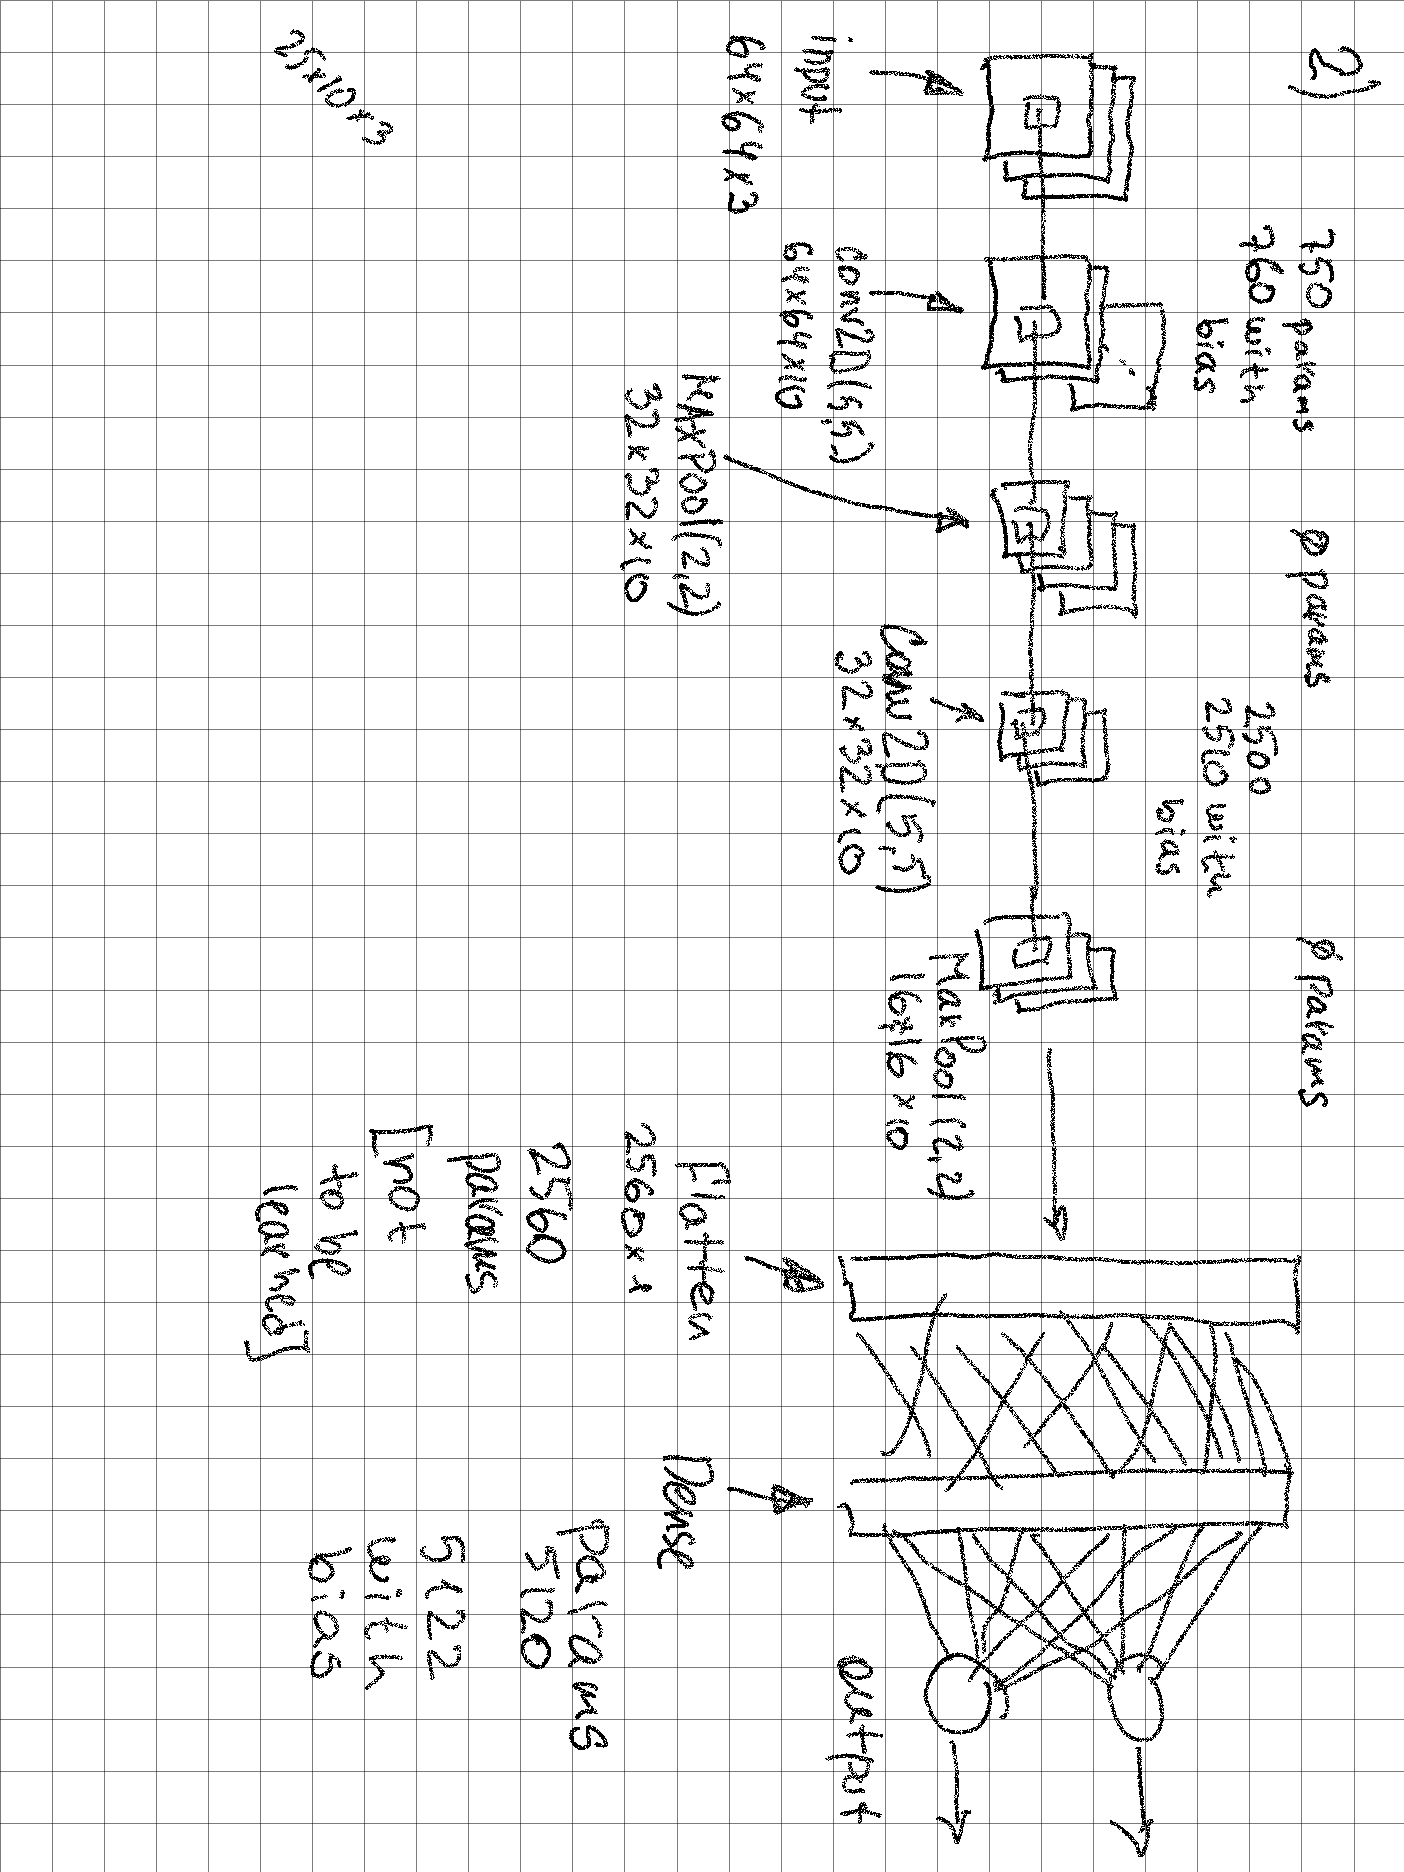

Task 3.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

from task3 import log_loss, grad
os.chdir('Z:\Documents\TUT\Pattern Recognition and Machine Learning\Exercises\Ex4')

Last Iteration: w = [0.6923258  2.16729083]


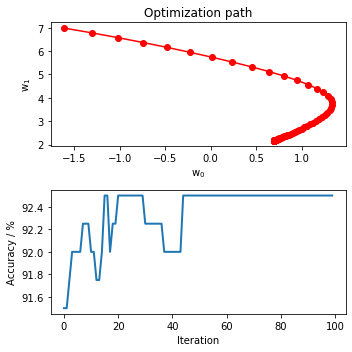

In [8]:
# Add your code here:
# 1) Load X and y.   
X = np.array(np.genfromtxt('X.csv',delimiter=','))    
y = np.array(np.genfromtxt('y.csv'))

# 2) Initialize w at w = np.array([1, -1])
w = np.array([1,-1])

# 3) Set step_size to a small positive value.
step_size = 0.01

# 4) Initialize empty lists for storing the path and
W = []; accuracies = []
# accuracies: W = []; accuracies = []


for iteration in range(100):

    # 5) Apply the gradient descent rule.
    g = grad(w,X,y)
    w = w - step_size*g

    # 6) Print the current state.
    #print ("Iteration %d: w = %s (log-loss = %.2f)" % (iteration, str(w), log_loss(w, X, y)))

    # 7) Compute the accuracy (already done for you)

    # Predict class 1 probability
    y_prob = 1 / (1 + np.exp(-np.dot(X, w)))
            # Threshold at 0.5 (results are 0 and 1)
    y_pred = (y_prob > 0.5).astype(int)
            # Transform [0,1] coding to [-1,1] coding
    y_pred = 2*y_pred - 1

    accuracy = np.mean(y_pred == y)
    accuracies.append(accuracy)

    W.append(w)

print ("Last Iteration: w = %s" % (str(W[-1])))
# 8) Below is a template for plotting. Feel free to 
# rewrite if you prefer different style.

W = np.array(W)

plt.figure(figsize = [5,5])
plt.subplot(211)
plt.plot(W[:,0], W[:,1], 'ro-')
plt.xlabel('w$_0$')
plt.ylabel('w$_1$')
plt.title('Optimization path')

plt.subplot(212)
plt.plot(100.0 * np.array(accuracies), linewidth = 2)
plt.ylabel('Accuracy / %')
plt.xlabel('Iteration')
plt.tight_layout()
plt.savefig("log_loss_minimization.pdf", bbox_inches = "tight")

Task 4.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

N = 32
w,h = 5,5

model = Sequential()

model.add(Conv2D(N,(w,h),input_shape=(64,64,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Conv2D(N, (w,h), activation='relu',padding='same'))
model.add(MaxPooling2D((4,4)))

model.add(Flatten())
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(2,activation='softmax'))

print(model.summary())

Using TensorFlow backend.
W1117 13:41:56.498006 66864 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1117 13:41:56.546869 66864 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1117 13:41:56.554818 66864 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1117 13:41:56.606340 66864 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total para

Task 5.